In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('final_data.csv')

In [3]:
df

,datetime,weekday,DELHI,BRPL,BYPL,NDMC,MES,temperature,humidity,wind_speed,precipitation
0,01-01-2022 00:00,Saturday,2144.41,860.87,428.55,117.82,25.93,12.428500,33.5,6.248988,0.0
1,01-01-2022 02:00,Saturday,1682.70,669.86,316.20,84.25,22.44,13.778500,32.0,5.895715,0.0
2,01-01-2022 04:00,Saturday,1584.39,644.04,289.28,71.18,22.41,16.703499,30.0,5.403824,0.0
3,01-01-2022 06:00,Saturday,2200.73,915.56,424.79,90.34,30.11,18.803500,28.5,6.218656,0.0
4,01-01-2022 08:00,Saturday,3754.84,1570.12,819.50,102.39,41.24,19.778500,26.5,6.369880,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

datetime          15
weekday           15
DELHI            355
BRPL             355
BYPL             355
NDMC             355
MES              355
temperature       15
humidity          15
wind_speed        15
precipitation     15
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df

,datetime,weekday,DELHI,BRPL,BYPL,NDMC,MES,temperature,humidity,wind_speed,precipitation
0,01-01-2022 00:00,Saturday,2144.41,860.87,428.55,117.82,25.93,12.428500,33.5,6.248988,0.00
1,01-01-2022 02:00,Saturday,1682.70,669.86,316.20,84.25,22.44,13.778500,32.0,5.895715,0.00
2,01-01-2022 04:00,Saturday,1584.39,644.04,289.28,71.18,22.41,16.703499,30.0,5.403824,0.00
3,01-01-2022 06:00,Saturday,2200.73,915.56,424.79,90.34,30.11,18.803500,28.5,6.218656,0.00
4,01-01-2022 08:00,Saturday,3754.84,1570.12,819.50,102.39,41.24,19.778500,26.5,6.369880,0.00
...,...,...,...,...,...,...,...,...,...,...,...
11740,05-09-2024 08:00,Thursday,3994.77,1703.06,903.75,176.90,33.88,31.075500,71.0,7.069171,0.50
11741,05-09-2024 10:00,Thursday,4903.11,1958.36,1094.03,257.57,40.81,30.050499,79.5,5.137552,1.40
11742,05-09-2024 12:00,Thursday,5363.84,2189.02,1167.35,279.78,40.91,29.350500,83.5,3.024669,0.45
11743,05-09-2024 14:00,Thursday,5482.69,2215.58,1252.96,282.39,39.77,28.125500,87.0,9.985511,1.20


In [7]:
df.isnull().sum()

datetime         0
weekday          0
DELHI            0
BRPL             0
BYPL             0
NDMC             0
MES              0
temperature      0
humidity         0
wind_speed       0
precipitation    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11405 entries, 0 to 11744
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       11405 non-null  object 
 1   weekday        11405 non-null  object 
 2   DELHI          11405 non-null  float64
 3   BRPL           11405 non-null  float64
 4   BYPL           11405 non-null  float64
 5   NDMC           11405 non-null  float64
 6   MES            11405 non-null  float64
 7   temperature    11405 non-null  float64
 8   humidity       11405 non-null  float64
 9   wind_speed     11405 non-null  float64
 10  precipitation  11405 non-null  float64
dtypes: float64(9), object(2)
memory usage: 1.0+ MB


In [9]:
df = df.copy()  
df['datetime'] = pd.to_datetime(df['datetime'], format='%d-%m-%Y %H:%M')
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month

# Convert weekday to numeric
weekday_map = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
df['weekday'] = df['weekday'].map(weekday_map)

In [10]:
# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

In [11]:
# Select features and targets
features = ['weekday', 'hour', 'month', 'temperature', 'humidity', 'wind_speed', 'precipitation']
targets = ['DELHI', 'BRPL', 'BYPL', 'NDMC', 'MES']

In [12]:
# Initialize dictionary to store models and predictions
models = {}
predictions = {}

In [13]:
# Train a Random Forest model for each target
for target in targets:
    X = df[features]
    y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    models[target] = rf_model
    predictions[target] = rf_model.predict(X_test)


    # Calculate performance metrics
    mse = mean_squared_error(y_test, predictions[target])
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions[target])
    mape = mean_absolute_percentage_error(y_test, predictions[target])
    
    print(f"{target}:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAPE: {mape:.2f}%")
    print(f"  R2: {r2:.2f}")
    print()

DELHI:
  RMSE: 364.79
  MAPE: 6.38%
  R2: 0.93

BRPL:
  RMSE: 168.59
  MAPE: 6.87%
  R2: 0.92

BYPL:
  RMSE: 82.69
  MAPE: 6.70%
  R2: 0.93

NDMC:
  RMSE: 22.08
  MAPE: 9.51%
  R2: 0.88

MES:
  RMSE: 3.31
  MAPE: 8.20%
  R2: 0.86



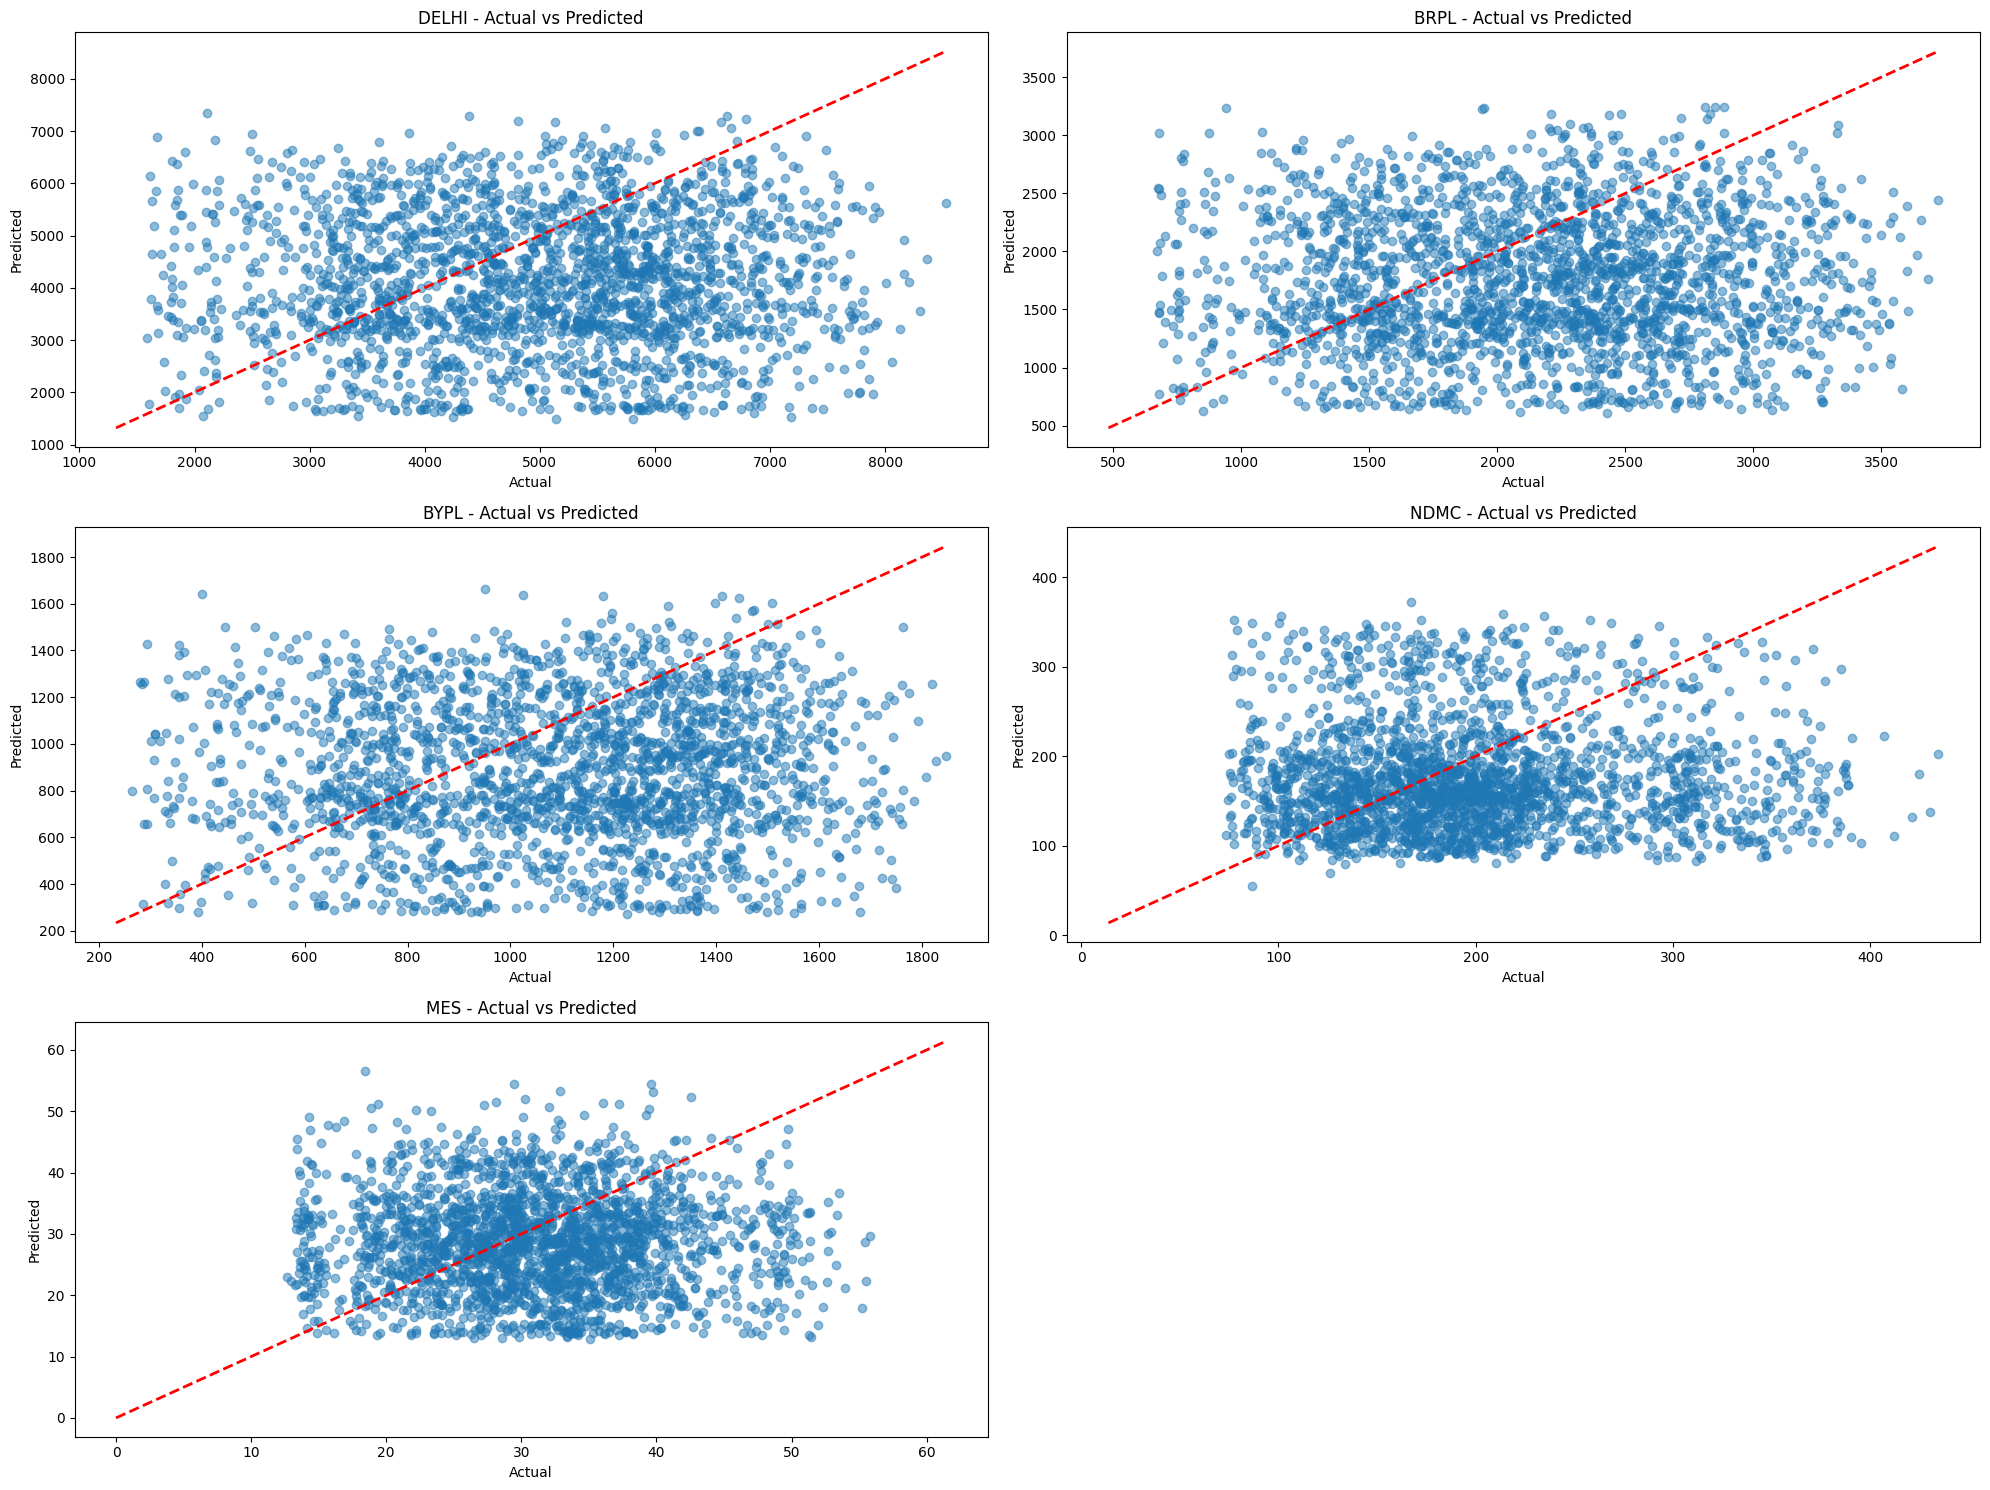

In [14]:
plt.figure(figsize=(20, 15))
for i, target in enumerate(targets, 1):
    plt.subplot(3, 2, i)
    plt.scatter(df[target].iloc[-len(predictions[target]):], predictions[target], alpha=0.5)
    plt.plot([df[target].min(), df[target].max()], [df[target].min(), df[target].max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{target} - Actual vs Predicted')
plt.tight_layout()
plt.show()